In [1]:
from sympy import symbols, Function, Eq, dsolve, solve

# Define the symbols
t = symbols('t')
N = Function('N')(t)
beta, delta, p = symbols('beta delta p')

# Define the differential equation
diff_eq = Eq(N.diff(t), beta * N**2 / (1 + N) - delta * N - p * N**2)

diff_eq

Eq(Derivative(N(t), t), beta*N(t)**2/(N(t) + 1) - delta*N(t) - p*N(t)**2)

In [2]:
# Assign the given values to the parameters
beta_value = 12
delta_value = 3
p_value = 2

# Substitute the values into the differential equation
diff_eq_substituted = diff_eq.subs({beta: beta_value, delta: delta_value, p: p_value})

# Display the substituted differential equation
diff_eq_substituted


Eq(Derivative(N(t), t), -2*N(t)**2 - 3*N(t) + 12*N(t)**2/(N(t) + 1))

In [3]:

# Find the stationary points by setting the right-hand side of the differential equation to zero
stationary_points = solve(diff_eq_substituted.rhs, N)

# Display the stationary points
stationary_points


[0, 1/2, 3]

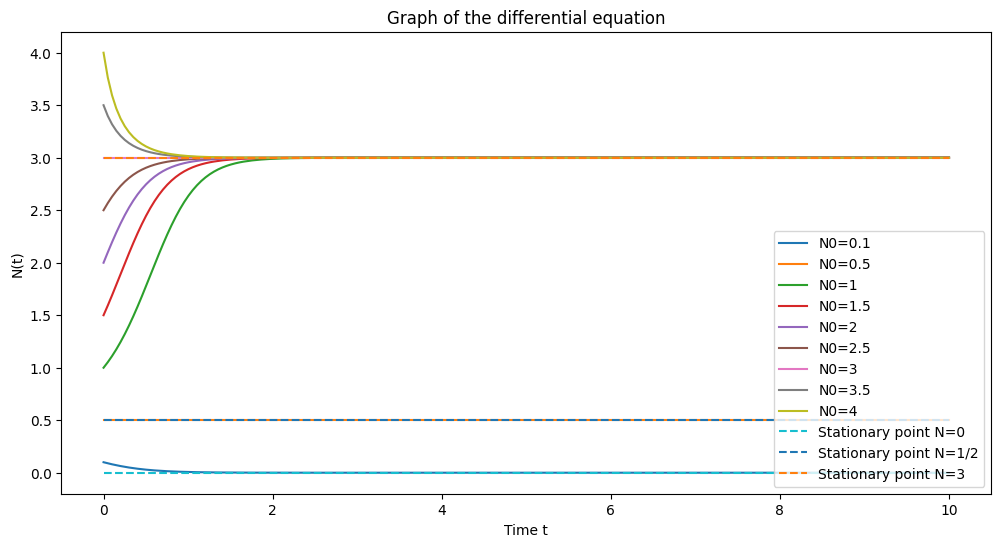

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Define the right-hand side of the differential equation
def dN_dt(N, t, beta, delta, p):
    return beta * N**2 / (1 + N) - delta * N - p * N**2

# Parameter values
beta_value = 12
delta_value = 3
p_value = 2

# Time vector from 0 to 10
time = np.linspace(0, 10, 200)

# Initial conditions for N(t)
initial_conditions = [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

# Plot the solutions for different initial conditions
plt.figure(figsize=(12, 6))
for N0 in initial_conditions:
    solution = odeint(dN_dt, N0, time, args=(beta_value, delta_value, p_value))
    plt.plot(time, solution, label=f'N0={N0}')

# Mark the stationary points on the graph
for sp in stationary_points:
    plt.plot(time, [sp]*len(time), '--', label=f'Stationary point N={sp}')

plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.legend()
plt.title('Graph of the differential equation')
plt.show()


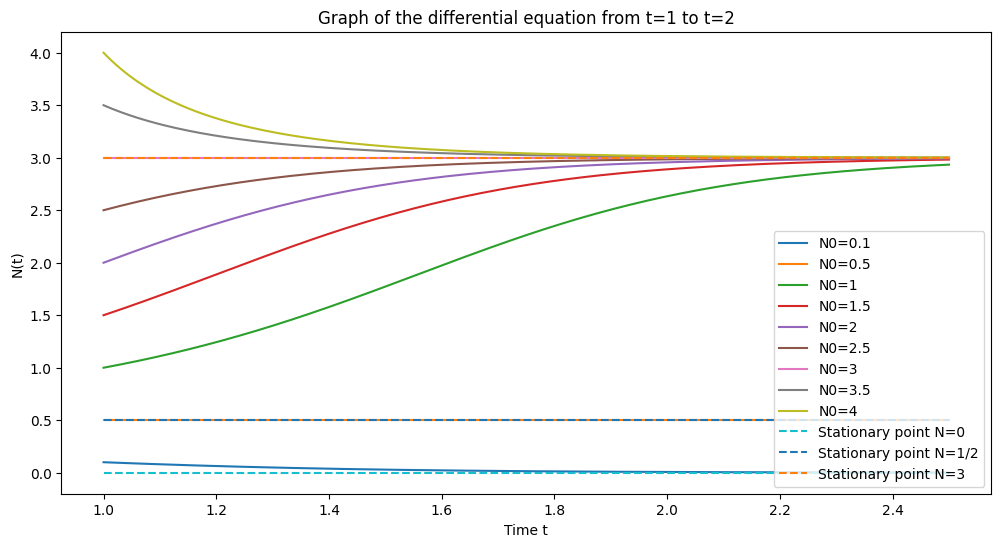

In [5]:
# Time vector from 1 to 2
time = np.linspace(1, 2.5, 200)

# Plot the solutions for different initial conditions
plt.figure(figsize=(12, 6))
for N0 in initial_conditions:
    solution = odeint(dN_dt, N0, time, args=(beta_value, delta_value, p_value))
    plt.plot(time, solution, label=f'N0={N0}')

# Mark the stationary points on the graph
for sp in stationary_points:
    plt.plot(time, [sp]*len(time), '--', label=f'Stationary point N={sp}')

plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.legend()
plt.title('Graph of the differential equation from t=1 to t=2')
plt.show()

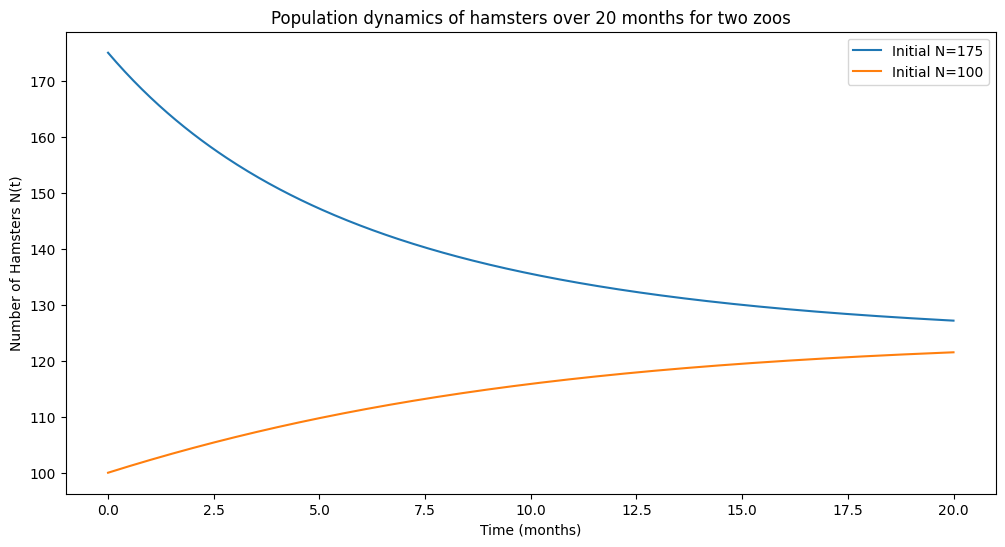

In [6]:
# New differential equation parameters
beta_new = 0.125
p_new = 0.001

# Time vector from 0 to 20 months
time_20_months = np.linspace(0, 20, 400)

# Initial conditions for N(t) for both zoos
initial_conditions_zoos = [175, 100]  # First zoo starts with 175, second with 100

# Plot the solutions for both zoos
plt.figure(figsize=(12, 6))
for N0 in initial_conditions_zoos:
    solution = odeint(dN_dt, N0, time_20_months, args=(beta_new, 0, p_new))
    plt.plot(time_20_months, solution, label=f'Initial N={N0}')

plt.xlabel('Time (months)')
plt.ylabel('Number of Hamsters N(t)')
plt.legend()
plt.title('Population dynamics of hamsters over 20 months for two zoos')
plt.show()

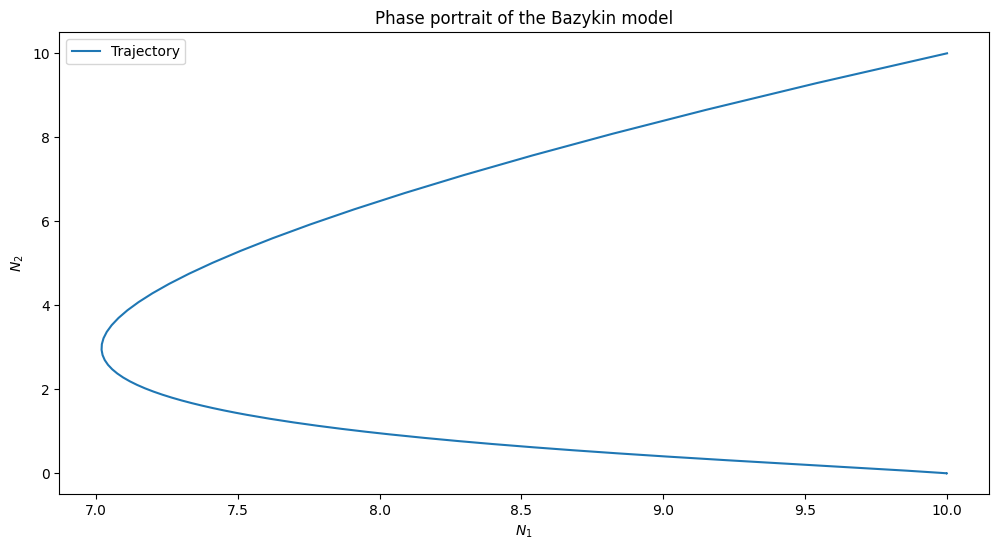

In [7]:
from scipy.integrate import odeint

# Define the parameters for the Bazykin model (assuming some typical values for demonstration)
A, B, C, D, E, M, beta = 1, 0.1, 1, 0.1, 0.1, 0.1, 0.1

# Bazykin model equations
def dN_dt(N, t, A, B, C, D, E, M, beta):
    N1, N2 = N
    dN1_dt = A * N1 - B * N1 * N2 - E * N1**2
    dN2_dt = -C * N2 + D * N1 * N2 / (1 + beta * N1) - M * N2**2
    return [dN1_dt, dN2_dt]

# Initial conditions for N1 and N2
N0 = [10, 10]  # Initial number of both species

# Time vector
time = np.linspace(0, 50, 1000)

# Solve the Bazykin model equations
solution = odeint(dN_dt, N0, time, args=(A, B, C, D, E, M, beta))

# Plot the phase portrait
plt.figure(figsize=(12, 6))
plt.plot(solution[:, 0], solution[:, 1], label='Trajectory')
plt.xlabel('$N_1$')
plt.ylabel('$N_2$')
plt.title('Phase portrait of the Bazykin model')
plt.legend()
plt.show()


In [8]:
from sympy import symbols, Eq, solve

# Define the symbols for the two populations
N1, N2 = symbols('N1 N2', real=True, positive=True)
A, B, C, D, E, M, beta = symbols('A B C D E M beta', real=True, positive=True)

# Define the system of differential equations
eq1 = Eq(A * N1 - B * N1 * N2 - E * N1**2, 0)
eq2 = Eq(-C * N2 + D * N1 * N2 / (1 + beta * N1) - M * N2**2, 0)

# Solve the system of equations for N1 and N2
equilibrium_points = solve((eq1, eq2), (N1, N2))

# Display the equilibrium points
equilibrium_points


KeyboardInterrupt: 